# Exploratory Data Analysis: LBPD Police Stops

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
file_path = '/Users/terencerustia/Documents/Data Science/Long Beach Policing Analysis/processed_data/'

# Race

In [3]:
race_df = pd.read_csv(file_path + 'PROCESSED_1_race.csv')
race_df.drop('ObjectId', axis=1, inplace=True)
race_df.rename(columns= lambda x: re.sub('perceivedRace_', '', x), inplace=True)

In [4]:
race_df.head(3)

,StopID,PID,Asian,Black,Hispanic,Middle Eastern or South Asian,Native American,Pacific Islander,White
0,5782,1,0,0,0,0,0,0,1
1,5785,1,0,0,0,0,0,0,1
2,5786,1,0,0,0,0,0,0,1


In [5]:
race_cols = race_df.drop(['StopID', 'PID'], axis=1).columns

### Aggregate number of police stops

In [6]:
print('The total number of LBPD police stops in 2019 is', len(race_df['StopID'].unique()))

The total number of LBPD police stops in 2019 is 36788


In [7]:
stop_sums = pd.DataFrame(race_df[race_cols].sum()).reset_index()
stop_sums.rename(columns={'index': 'race', 0: 'total_stops'}, inplace=True)

In [8]:
stop_sums

,race,total_stops
0,Asian,3150
1,Black,12472
2,Hispanic,16716
3,Middle Eastern or South Asian,1804
4,Native American,1301
5,Pacific Islander,1700
6,White,10972


## Getting Census Data to Normalize Race Data

In [9]:
lb_census = pd.read_csv('/Users/terencerustia/Documents/Data Science/Long Beach Policing Analysis/raw_data/2019_lb_census.csv')

In [10]:
plt.style.use('default')
%matplotlib inline

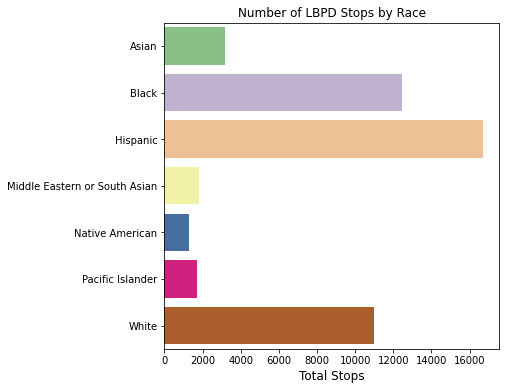

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='total_stops', y='race', data=stop_sums, palette='Accent')
g.set_ylabel('')
g.set_xlabel('Total Stops', fontsize=12)
g.set_title('Number of LBPD Stops by Race')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10); 

In [12]:
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' alone', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' or African American', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub('American Indian and Alaska Native', 'Native American', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub('Native Hawaiian and Other ', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' or Latino', '', x))

In [13]:
lb_census

,Race,Value
0,White,131216
1,Black,50432
2,Native American,668
3,Asian,54436
4,Pacific Islander,2468
5,Some other race,3008
6,Hispanic,207396


In [14]:
stop_sums_pop = stop_sums.merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
stop_sums_pop.rename(columns={'Value':'population'}, inplace=True)
stop_sums_pop

,race,total_stops,population
0,Asian,3150,54436
1,Black,12472,50432
2,Hispanic,16716,207396
3,Native American,1301,668
4,Pacific Islander,1700,2468
5,White,10972,131216


In [15]:
stop_sums_pop['perThou'] = round(stop_sums_pop['total_stops'] / (stop_sums_pop['population'] / 1000), 1)
stop_sums_pop

,race,total_stops,population,perThou
0,Asian,3150,54436,57.9
1,Black,12472,50432,247.3
2,Hispanic,16716,207396,80.6
3,Native American,1301,668,1947.6
4,Pacific Islander,1700,2468,688.8
5,White,10972,131216,83.6


In [16]:
stop_sums_pop[stop_sums_pop['race'] != 'Hispanic'].sum()

race           AsianBlackNative AmericanPacific IslanderWhite
total_stops                                             29595
population                                             239220
perThou                                                3025.2
dtype: object

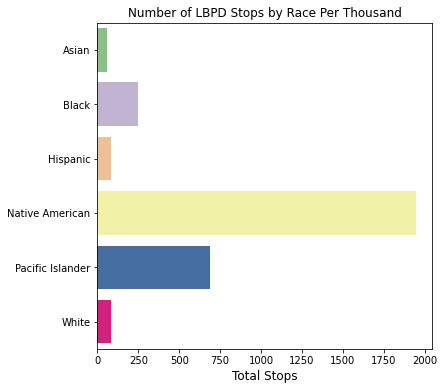

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='perThou', y='race', data=stop_sums_pop, palette='Accent')
g.set_ylabel('')
g.set_xlabel('Total Stops', fontsize=12)
g.set_title('Number of LBPD Stops by Race Per Thousand')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10);

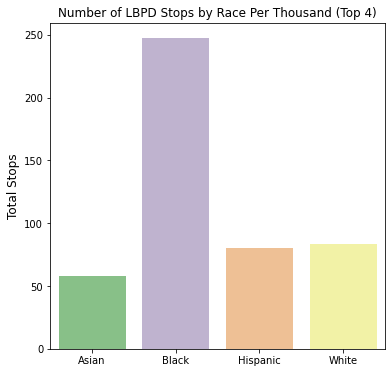

In [18]:
# 4 Largest Racial Populations in Long Beach
top_4 = stop_sums_pop[stop_sums_pop['race'].isin(['Asian', 'Black', 'Hispanic', 'White'])]
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='race', y='perThou', data=top_4, palette='Accent')
g.set_ylabel('Total Stops', fontsize=12)
g.set_xlabel('')
g.set_title('Number of LBPD Stops by Race Per Thousand (Top 4)')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10);

In [19]:
c_top_4 = top_4[['race', 'perThou']].transpose()
c_top_4.columns = c_top_4.iloc[0]
c_top_4.columns.name = None
c_top_4.drop('race', axis=0, inplace=True)
print('Total Stops Per Thousand - LB Top 4 Race Populations')
c_top_4

Total Stops Per Thousand - LB Top 4 Race Populations


,Asian,Black,Hispanic,White
perThou,57.9,247.3,80.6,83.6


#### Black Long Beach residents are more than three times as likely to be stopped compared to residents of other racial groups

____

# Breaking down Stops by Race

In [20]:
main_df = pd.read_csv(file_path + 'PROCESSED_0_to_5.csv')

/Users/terencerustia/opt/anaconda3/envs/lbpd_acab_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
main_df.head(3)

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,...,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven,resultOfStop,resultOfStopcode,resultOfStopcodeText
0,5875,2019/01/01 00:00:00,2020/06/26 07:41:59,5,0,200.0,E First St,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54153,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153,Curbside detention,NaN,NaN,Citation for infraction,54153.0,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153
1,5782,2019/01/01 00:00:00,2020/06/26 00:04:59,5,1,5900.0,Long Beach Blvd,NaN,NaN,NaN,...,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38021,273(A) PC - ILLEGAL PAY FOR ADOPTION (M) 38021,Curbside detention,NaN,NaN,Field interview card completed,NaN,NaN
2,5876,2019/01/01 00:00:00,2020/06/26 18:17:00,4,0,6600.0,Butler Ave,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,None,NaN,NaN,No Action,NaN,NaN


In [22]:
rfs_replace_dict = {'warrant': 'Outstanding Arrest Warrant', 'Parole': 'Parole/Probation/Supervision', 'truant':'Truancy Investigation', 'Consensual Encounter': 'Consensual Encounter/Search'}

## Reasons For Stop by Race

In [23]:
total_df = pd.DataFrame(main_df[['reasonForStop', 'perceivedRace']])

In [24]:
total_df = total_df[~total_df['reasonForStop'].str.contains('Possible conduct|school policy')]
total_df

,reasonForStop,perceivedRace
0,Traffic Violation,Black
1,Reasonable Suspicion,White
2,Traffic Violation,Hispanic
3,Knowledge of outstanding arrest warrant/wanted...,Black
4,Reasonable Suspicion,White
...,...,...
82538,Traffic Violation,Asian
82539,Traffic Violation,Asian
82540,Traffic Violation,Hispanic
82541,Traffic Violation,Black


In [25]:
rfs_replace_dict = {'warrant/': 'Outstanding Arrest Warrant', 'Parole': 'Parole/Probation/Supervision', 'truant':'Truancy Investigation', 'Consensual Encounter': 'Consensual Encounter/Search'}

for r in rfs_replace_dict:
    total_df.loc[total_df['reasonForStop'].str.contains(r), 'reasonForStop'] = rfs_replace_dict[r]


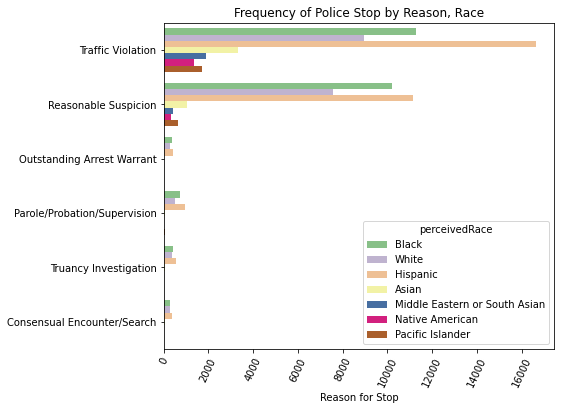

In [26]:
plt.style.use('default')
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(y='reasonForStop', data=total_df, hue='perceivedRace', palette='Accent')
ax.tick_params(axis='x', labelsize=10, rotation=65)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('Reason for Stop')
plt.ylabel('')
plt.title('Frequency of Police Stop by Reason, Race');

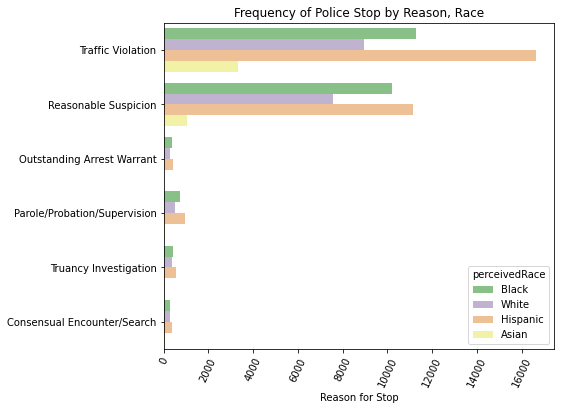

In [27]:
# 4 highest racial populations
plt.style.use('default')
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(y='reasonForStop', data=total_df[total_df['perceivedRace'].isin(['Black', 'White', 'Hispanic', 'Asian'])], hue='perceivedRace', palette='Accent')
ax.tick_params(axis='x', labelsize=10, rotation=65)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('Reason for Stop')
plt.ylabel('')
plt.title('Frequency of Police Stop by Reason, Race');

#### Normalize: Frequency of Police Stop By Reason & Race, Per Thousand

In [28]:
reasonStop1000 = pd.DataFrame(total_df.groupby(['reasonForStop', 'perceivedRace']).size().reset_index())
reasonStop1000 = reasonStop1000[reasonStop1000['perceivedRace'].isin(['White', 'Black', 'Asian', 'Hispanic'])]
reasonStop1000.rename(columns={0:'count', 'perceivedRace':'race'}, inplace=True)
reasonStop1000 = reasonStop1000.merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
reasonStop1000['perThou'] = round(reasonStop1000['count'] / (reasonStop1000['Value']/ 1000), 1)

for r in rfs_replace_dict:
    reasonStop1000.loc[reasonStop1000['reasonForStop'].str.contains(r), 'reasonForStop'] = rfs_replace_dict[r]

reasonStop1000 = reasonStop1000[~reasonStop1000['reasonForStop'].str.contains('|'.join(['No Action', 'minor', 'school', 'Homeland', 'Noncriminal', 'Possible conduct warranting discipline']))]

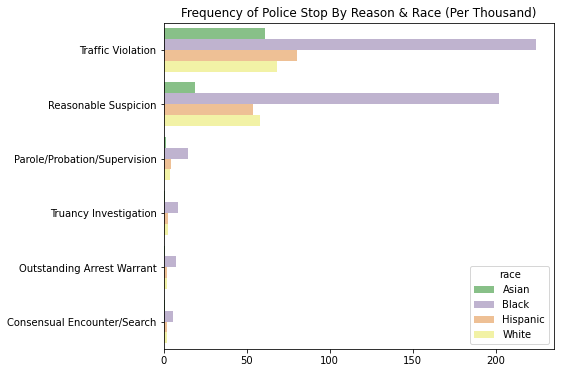

In [29]:
col_ord = ['Traffic Violation', 'Reasonable Suspicion', 'Parole/Probation/Supervision',
            'Truancy Investigation', 'Outstanding Arrest Warrant', 
            'Consensual Encounter/Search']

fig, ax = plt.subplots(figsize=(7,6))
g = sns.barplot(x='perThou', y='reasonForStop', data=reasonStop1000,
    hue='race', palette='Accent',
    order=col_ord)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency of Police Stop By Reason & Race (Per Thousand)');

In [30]:
c_reasonStop1000 = reasonStop1000.set_index(['reasonForStop', 'race']).sort_values(['race', 'perThou'], ascending=(True,False)).drop(['count', 'Value'], axis=1)
c_reasonStop1000 = c_reasonStop1000.reset_index().pivot(index='reasonForStop', columns='race', values='perThou')
c_reasonStop1000.columns.name=None
c_reasonStop1000

,Asian,Black,Hispanic,White
reasonForStop,,,,
Consensual Encounter/Search,0.8,5.8,1.8,2.1
Outstanding Arrest Warrant,0.7,7.4,1.9,2.1
Parole/Probation/Supervision,1.2,14.6,4.6,3.7
Reasonable Suspicion,19.2,202.1,53.7,57.8
Traffic Violation,60.9,224.1,80.2,68.2
Truancy Investigation,1.1,8.6,2.7,2.7


## Reason for Stop Detail By Race

In [31]:
reasonDetail = main_df[main_df['perceivedRace'].isin(['White', 'Black', 'Asian', 'Hispanic'])].rename(columns={'perceivedRace':'race'})
reasonDetail = reasonDetail[reasonDetail['reasonForStopDetail'].notna()]

In [32]:
detail_replace_dict = {'Other Reasonable Suspicion':'Other Reasonable Suspicion', 
'Officer witnessed':'Officer witnessed crime', 
'Non-moving':'Non-moving Violation', 
'Witness or Victim Iden':'Witness/Victim ID of Suspect', 
'engaging in violent crime':'Actions indicative - Violent crime', 
'Casing a victim':'Actions indicative - casing victim/object', 'drug transaction':'Actions indicative - Drug transaction', 'hate violence': 'Hate violence', 'select subsection': 'Suspension/Expulsion (other)'}

for r in detail_replace_dict:
    reasonDetail.loc[reasonDetail['reasonForStopDetail'].str.contains(r), 'reasonForStopDetail'] = detail_replace_dict[r]

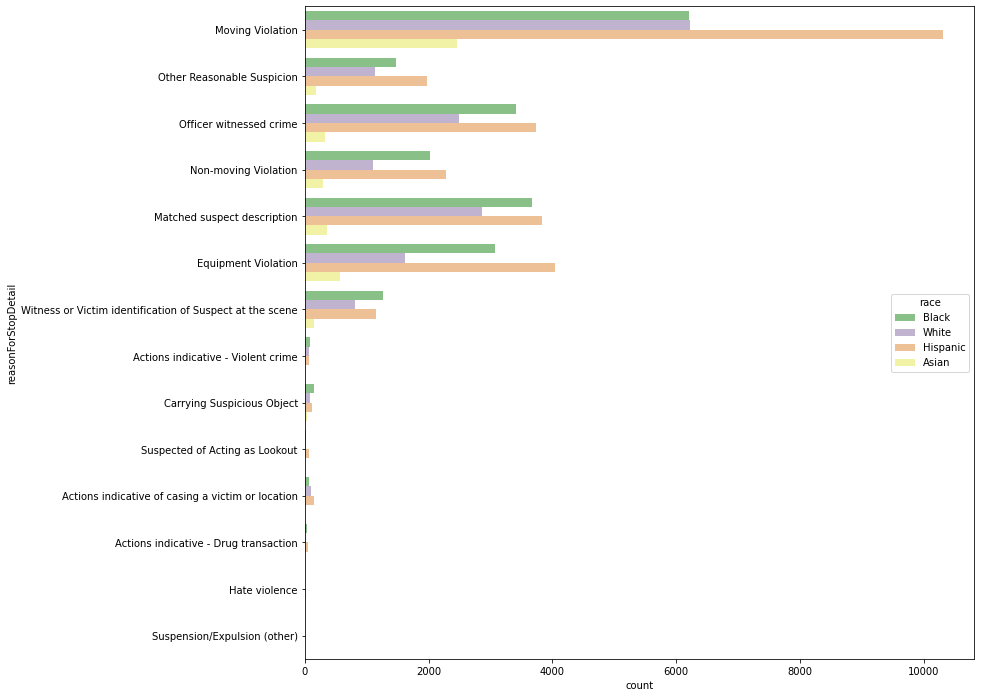

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
g = sns.countplot(y = 'reasonForStopDetail', data=reasonDetail, hue='race', palette='Accent')

#### Normalize: Police Stops By Reason Detail & Race, Per Thousand

In [34]:
reasonDetail_1000 = reasonDetail.groupby(['reasonForStopDetail', 'race']).size().reset_index()
reasonDetail_1000.rename(columns={0:'Count'}, inplace=True)
reasonDetail_1000 = reasonDetail_1000.merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
reasonDetail_1000['perThou'] = round(reasonDetail_1000['Count'] / (reasonDetail_1000['Value'] / 1000), 1)
reasonDetail_1000.drop(['Count', 'Value'], axis=1, inplace=True)

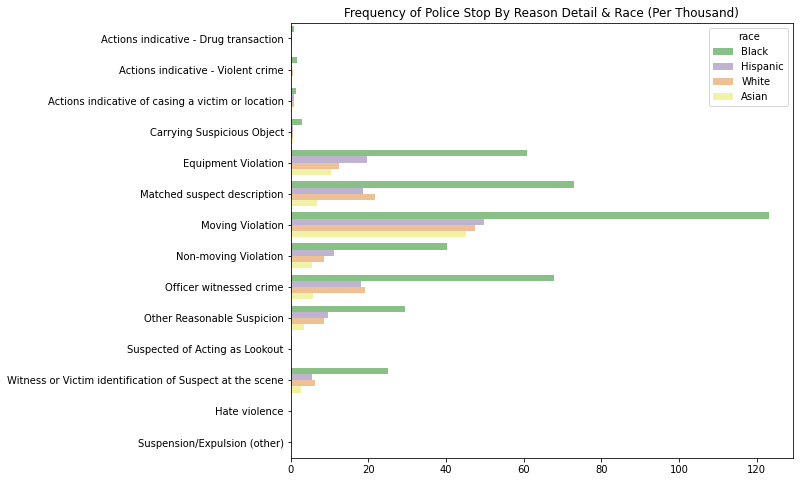

In [35]:
fig, ax = plt.subplots(figsize=(9,8))
g = sns.barplot(x='perThou', y='reasonForStopDetail', data=reasonDetail_1000,
    hue='race', palette='Accent')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency of Police Stop By Reason Detail & Race (Per Thousand)');

In [36]:
reasonDetail_1000.head()
c_reasonDetail_1000 = reasonDetail_1000.pivot(index='reasonForStopDetail', columns='race', values='perThou')
c_reasonDetail_1000.columns.name = None
c_reasonDetail_1000

,Asian,Black,Hispanic,White
reasonForStopDetail,,,,
Actions indicative - Drug transaction,NaN,0.8,0.3,0.2
Actions indicative - Violent crime,0.0,1.7,0.3,0.5
Actions indicative of casing a victim or location,0.1,1.3,0.7,0.7
Carrying Suspicious Object,0.6,3.0,0.6,0.6
Equipment Violation,10.4,60.8,19.5,12.3
Hate violence,NaN,NaN,0.1,NaN
Matched suspect description,6.7,72.9,18.5,21.8
Moving Violation,45.2,123.2,49.7,47.4
Non-moving Violation,5.4,40.2,11.0,8.5


## Result of Stops By Race

In [37]:
resultStop = main_df[main_df['perceivedRace'].isin(['White', 'Black', 'Asian', 'Hispanic'])]
resultStop = resultStop[~resultStop['resultOfStop'].str.contains('|'.join(['minor', 'school', 'Homeland', 'Noncriminal']))]
resultStop

resultStop.loc[resultStop['resultOfStop'].str.contains('outstanding warrant'), 'resultOfStop'] = 'Custodial Arrest with warrant'

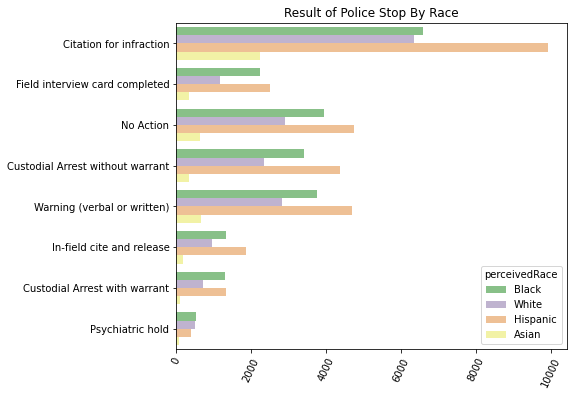

In [38]:
# plt.style.use('default')
# %matplotlib inline
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(y='resultOfStop', data=resultStop, hue='perceivedRace', palette='Accent')
ax.tick_params(axis='x', labelsize=10, rotation=65)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Result of Police Stop By Race');

#### Normalize: Police Stops By Result & Race, Per Thousand

In [39]:
resultStop1000 = resultStop.groupby(['resultOfStop', 'perceivedRace']).size().reset_index()
resultStop1000 = resultStop1000.rename(columns={'perceivedRace': 'race', 0:'count'}).merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
resultStop1000['perThou'] = round(resultStop1000['count'] / (resultStop1000['Value'] / 1000), 1)

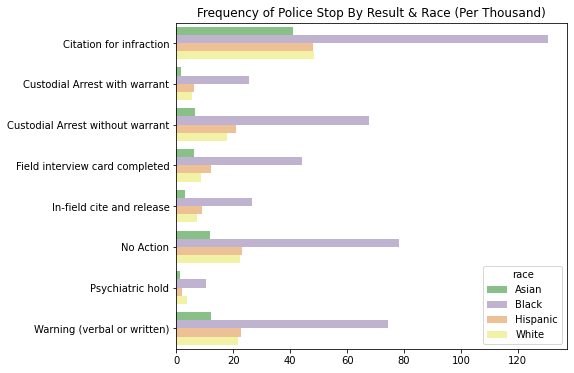

In [40]:
fig, ax = plt.subplots(figsize=(7,6))
g = sns.barplot(x='perThou', y='resultOfStop', data=resultStop1000,
    hue='race', palette='Accent')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency of Police Stop By Result & Race (Per Thousand)');

In [41]:
cast_res_stop = resultStop1000.set_index(['resultOfStop', 'race']).sort_values(['race','perThou'], ascending=(True,False)).drop(['count', 'Value'], axis=1)

cast_res_stop_1000 = cast_res_stop.reset_index().pivot(index='resultOfStop', columns='race', values='perThou')
cast_res_stop.columns.name = None

cast_res_stop_1000

race,Asian,Black,Hispanic,White
resultOfStop,,,,
Citation for infraction,41.0,130.8,47.9,48.4
Custodial Arrest with warrant,1.7,25.6,6.3,5.5
Custodial Arrest without warrant,6.4,67.8,21.1,17.8
Field interview card completed,6.3,44.2,12.0,8.8
In-field cite and release,3.0,26.4,8.9,7.3
No Action,11.7,78.3,22.9,22.2
Psychiatric hold,1.1,10.4,1.9,3.8
Warning (verbal or written),12.2,74.5,22.6,21.5


## Analysis of "No Result" Stops

In [42]:
no_result = main_df[main_df['resultOfStop'] == 'No Action']
no_result.rename(columns={'perceivedRace':'race'}, inplace=True)
no_result.loc[no_result['reasonForStop'].str.contains('Parole'), 'reasonForStop'] = 'On Parole/Probation/PRCS/Supervision'
no_result.loc[no_result['reasonForStop'].str.contains('truant'), 'reasonForStop'] = 'Investigating truancy'
no_result.loc[no_result['reasonForStop'].str.contains('arrest warrant'), 'reasonForStop'] = 'Outstanding arrest warrant/wanted person'
no_result = no_result[no_result['race'].isin(['White', 'Black', 'Hispanic', 'Asian'])]

/Users/terencerustia/opt/anaconda3/envs/lbpd_acab_env/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/terencerustia/opt/anaconda3/envs/lbpd_acab_env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


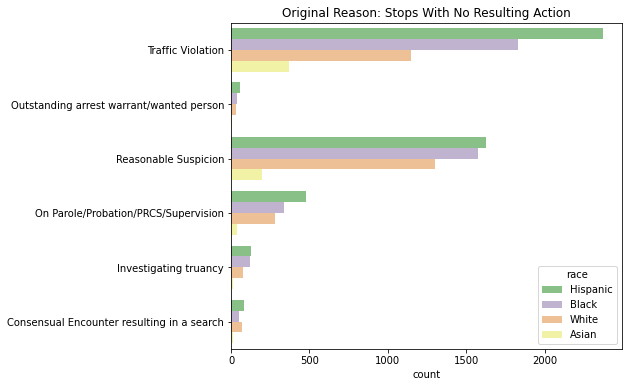

In [43]:
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(y='reasonForStop', data=no_result, hue='race', palette='Accent')
g.set_ylabel('')
g.set_title('Original Reason: Stops With No Resulting Action');

#### Normalize: "No Action" Stops By Race Per Thousand

In [88]:
no_result_1000 = no_result.groupby(['reasonForStop', 'race']).size().reset_index().rename(columns={0:'count'})
no_result_1000 = no_result_1000.merge(lb_census, left_on='race', right_on='Race')
no_result_1000.drop('Race', axis=1, inplace=True)
no_result_1000['perThou'] = round(no_result_1000['count'] / (no_result_1000['Value'] / 1000), 1)

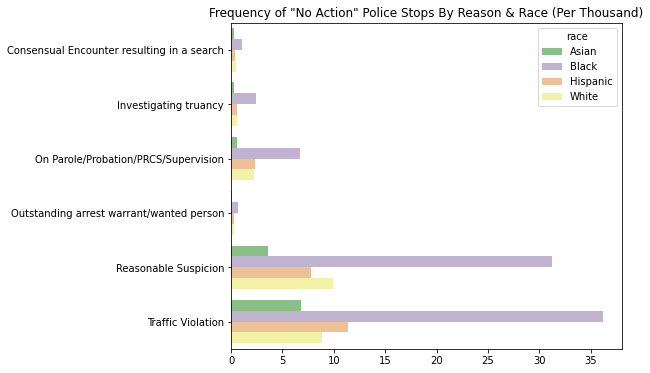

In [89]:
fig, ax = plt.subplots(figsize=(7,6))
g = sns.barplot(x='perThou', y='reasonForStop', data=no_result_1000,
    hue='race', palette='Accent')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency of "No Action" Police Stops By Reason & Race (Per Thousand)');

In [93]:
c_no_result_1000 = no_result_1000.pivot(index='reasonForStop', columns='race', values='perThou')
c_no_result_1000.columns.name = None
c_no_result_1000

,Asian,Black,Hispanic,White
reasonForStop,,,,
Consensual Encounter resulting in a search,0.3,1.1,0.4,0.5
Investigating truancy,0.3,2.4,0.6,0.6
On Parole/Probation/PRCS/Supervision,0.6,6.7,2.3,2.2
Outstanding arrest warrant/wanted person,0.1,0.7,0.3,0.3
Reasonable Suspicion,3.6,31.2,7.8,9.9
Traffic Violation,6.8,36.2,11.4,8.8


## Time Series Analysis

In [151]:
# Cleaning dates
time_series_df = main_df.copy()
time_series_df['stopDate'] = pd.to_datetime(main_df['stopDate']).dt.date
time_series_df['stopTime'] = pd.to_datetime(main_df['stopTime']).dt.time
time_series_df['hour'] = pd.to_datetime(main_df['stopTime']).dt.hour
time_series_df['hour'] = time_series_df['hour'].apply(str)

# Unique stops (including by individual)
unique_stops = time_series_df.drop_duplicates(subset=['StopID', 'PID'])


In [152]:
# Create new 'timeOfDay' feature
def time_of_day(val):
    from datetime import time
    from datetime import datetime as dt
    if val >= time(6,0,0) and val < time(17,0,0):
        return 'Day'
    elif val >= time(17,0,0) and val < time(23,0,0):
        return 'Evening'
    else:
        return 'Overnight'

In [153]:
time_series_df['timeOfDay'] = time_series_df['stopTime'].apply(lambda x: time_of_day(x))

In [154]:
time_series_df[['stopTime', 'timeOfDay']].head()

,stopTime,timeOfDay
0,07:41:59,Day
1,00:04:59,Overnight
2,18:17:00,Evening
3,18:25:35,Evening
4,01:04:00,Overnight


In [155]:
time_series_df['timeOfDay'].value_counts()

Day          39492
Evening      23416
Overnight    19635
Name: timeOfDay, dtype: int64

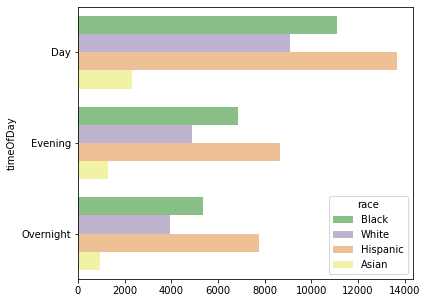

In [156]:
time_day_race_df = time_series_df.copy()[time_series_df['perceivedRace'].isin(['Hispanic', 'Black', 'Asian', 'White'])]
time_day_race_df.rename(columns={'perceivedRace':'race'}, inplace=True)

fig, ax = plt.subplots(figsize=(6,5))
g = sns.countplot(y='timeOfDay', data=time_day_race_df, hue='race', palette='Accent',
order=['Day', 'Evening', 'Overnight'])
g.set_xlabel('');

In [157]:
tdr_1000 = time_day_race_df.groupby(['timeOfDay', 'race']).size().reset_index()
tdr_1000.rename(columns={0:'count'}, inplace=True)
tdr_1000 = tdr_1000.merge(lb_census, left_on='race', right_on='Race')
tdr_1000.drop('Race', axis=1, inplace=True)
tdr_1000['perThou'] = round(tdr_1000['count'] / (tdr_1000['Value'] / 1000), 1)


Text(0, 0.5, '')

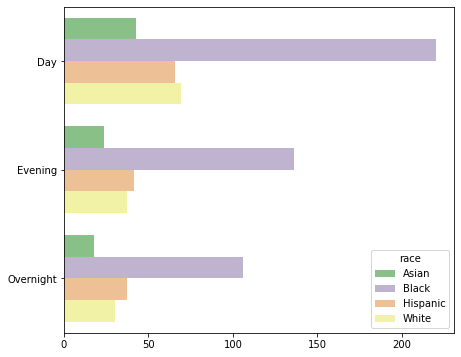

In [158]:
fig, ax = plt.subplots(figsize=(7,6))
g = sns.barplot(x='perThou', y='timeOfDay', data=tdr_1000,
    hue='race', palette='Accent')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
# plt.title('Frequency of "No Action" Police Stops By Reason & Race (Per Thousand)');

In [172]:
# GROUP BY HOUR!
tdr_hour_1000 = time_day_race_df.groupby(['hour', 'race']).size().reset_index()
tdr_hour_1000.rename(columns={0:'count'}, inplace=True)
tdr_hour_1000 = tdr_hour_1000.merge(lb_census, left_on='race', right_on='Race')
tdr_hour_1000.drop('Race', axis=1, inplace=True)
tdr_hour_1000['perThou'] = round(tdr_hour_1000['count'] / (tdr_hour_1000['Value'] / 1000), 1)


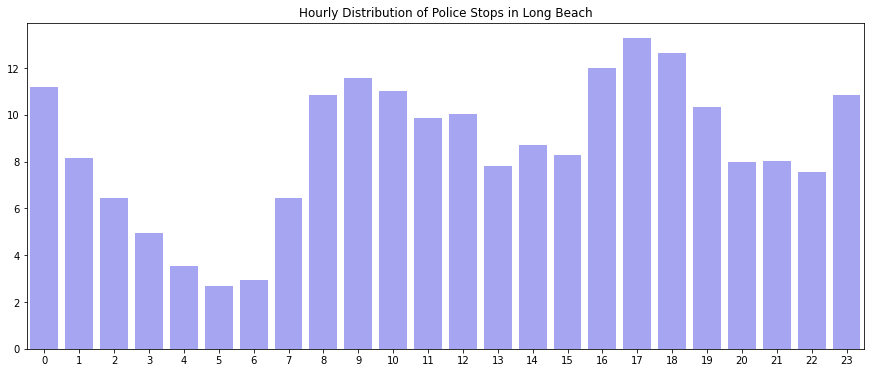

In [186]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(x='hour', y='perThou', data=tdr_hour_1000, ci=None,
    color='blue', alpha=0.4, order=map(str,list(range(0, 24))))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Hourly Distribution of Police Stops in Long Beach');

In [185]:
# FACET HOURLY STOPS!

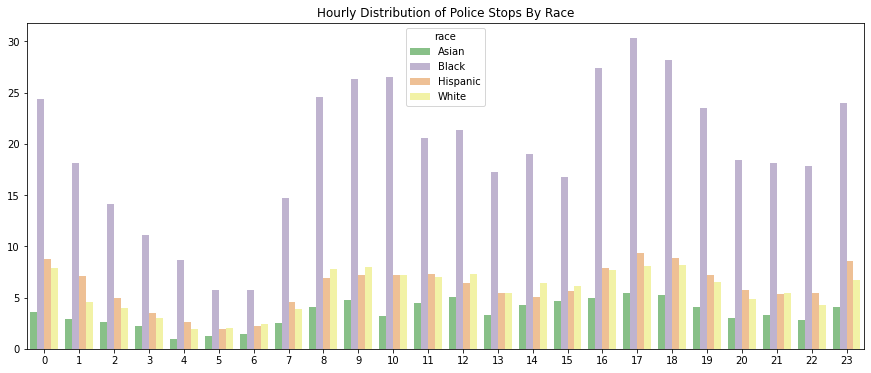

In [177]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(x='hour', y='perThou', data=tdr_hour_1000,
    hue='race', palette='Accent', order=map(str,list(range(0, 24))))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Hourly Distribution of Police Stops By Race');

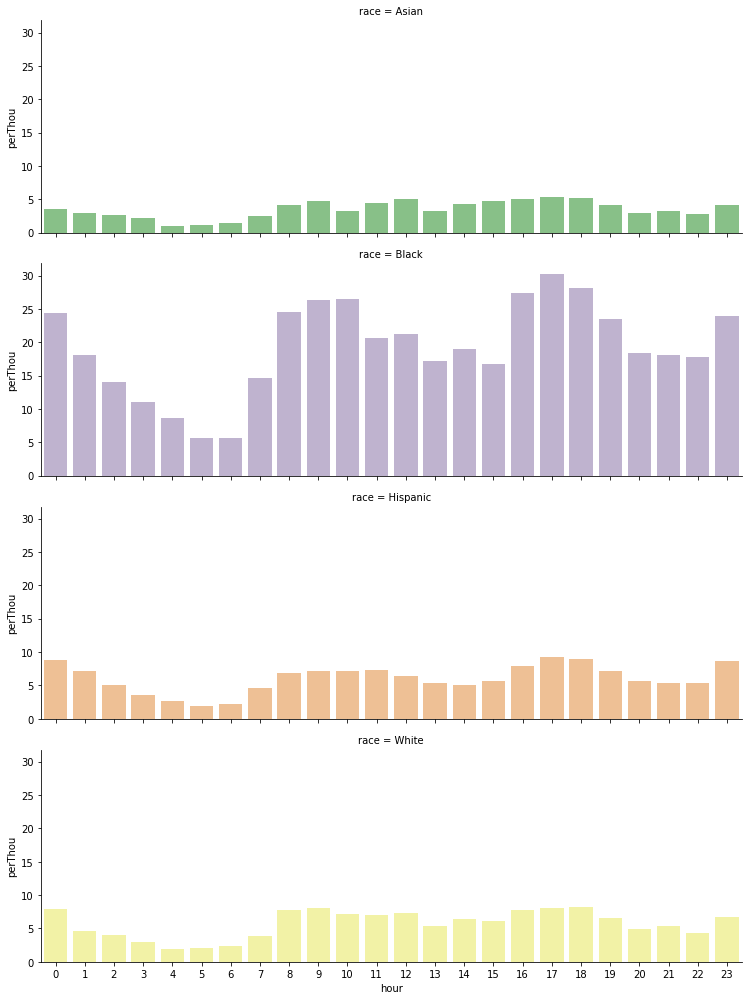

In [227]:
order = map(str,list(range(0, 24)))
g = sns.FacetGrid(tdr_hour_1000, row='race', height=3.5, aspect=3, hue='race', palette='Accent')
g.map(sns.barplot, 'hour', 'perThou', order = list(order))

In [224]:
order = map(str,list(range(0, 24)))
list(order)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

### Daily count of stops

In [52]:
 daily_count_df = unique_stops.groupby('stopDate').size().reset_index()
 daily_count_df.rename(columns={0:'Count'}, inplace=True)

In [53]:
daily_mean = daily_count_df['Count'].mean()

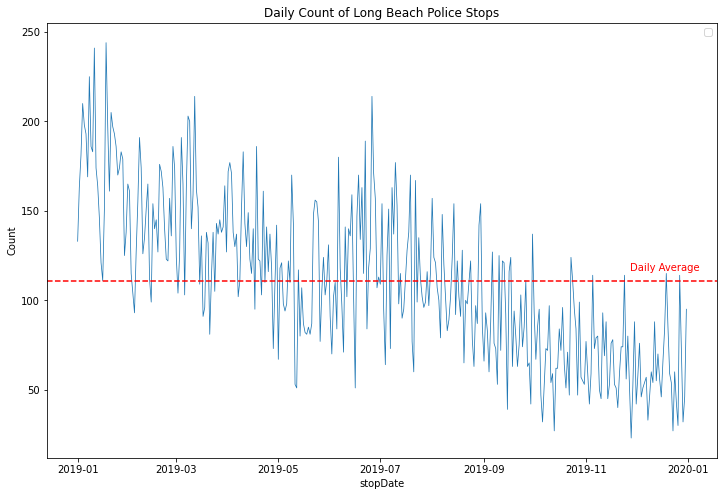

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.lineplot(x='stopDate', y='Count', data=daily_count_df, size=0.75)
g.axhline(daily_mean, ls='--', color='r')
fig.text(0.8, 0.45, 'Daily Average', color='r')
g.set_title('Daily Count of Long Beach Police Stops')
plt.legend('');

In [55]:
# Running Daily Total
running_count_df = daily_count_df.set_index('stopDate').cumsum()
running_count_df.rename(columns={'Count':'Running Total'}, inplace=True)
running_count_df.head()

,Running Total
stopDate,
2019-01-01,133
2019-01-02,296
2019-01-03,477
2019-01-04,687
2019-01-05,885


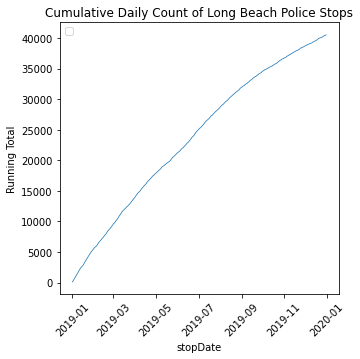

In [56]:
fig, ax = plt.subplots(figsize=(5,5))
g = sns.lineplot(x=running_count_df.index, y='Running Total', data=running_count_df, size=0.75)
g.set_title('Cumulative Daily Count of Long Beach Police Stops')
plt.xticks(rotation=45)
plt.legend('');

In [57]:
#####

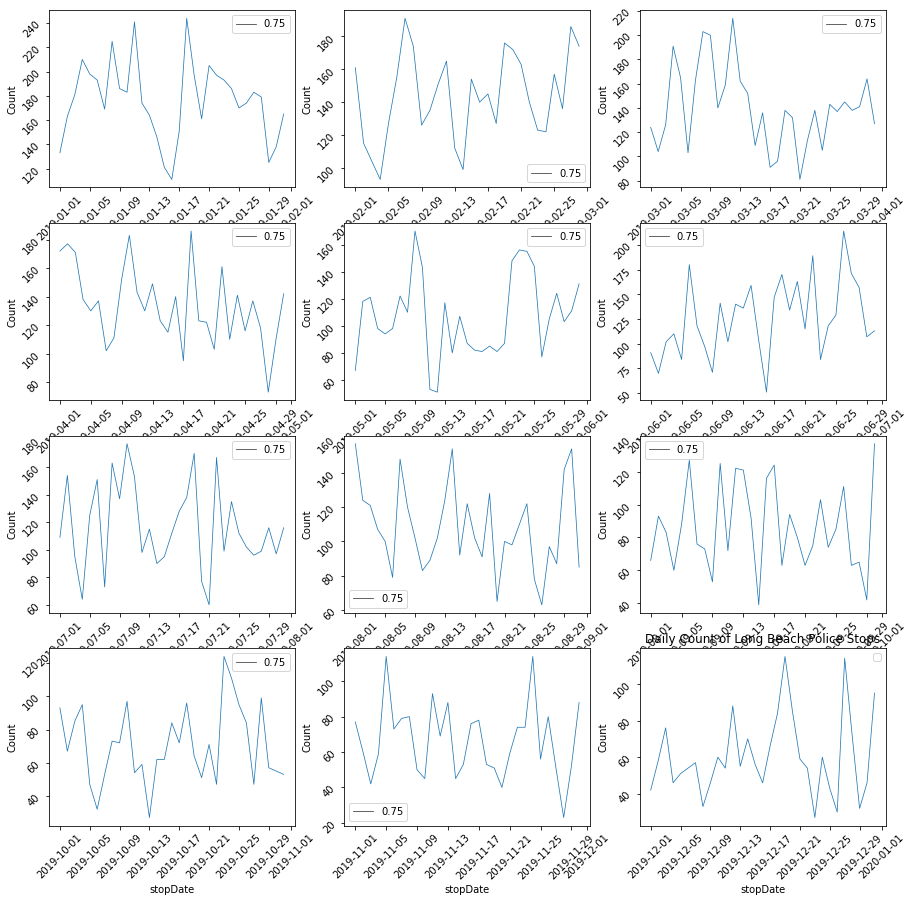

In [58]:
fig, ax = plt.subplots(figsize=(15,15), nrows=4, ncols=3)
mth = 1
for row in range(4):
    for col in range(3):
        sns.lineplot(x='stopDate', y='Count', data=daily_count_df[pd.to_datetime(daily_count_df['stopDate']).dt.month == mth], size=0.75, ax=ax[row][col])
        mth += 1
for ax in fig.axes:
    ax.tick_params(labelrotation=45)
plt.title('Daily Count of Long Beach Police Stops')
plt.legend('');

In [59]:
######

### Weekly Count of Stops

In [60]:
weekly_count = daily_count_df.copy()
weekly_count['week'] = pd.to_datetime(weekly_count['stopDate']).dt.isocalendar().week
weekly_count = weekly_count[:363]
weekly_count = weekly_count.groupby('week').sum()

In [61]:
weekly_mean = weekly_count.values.mean()

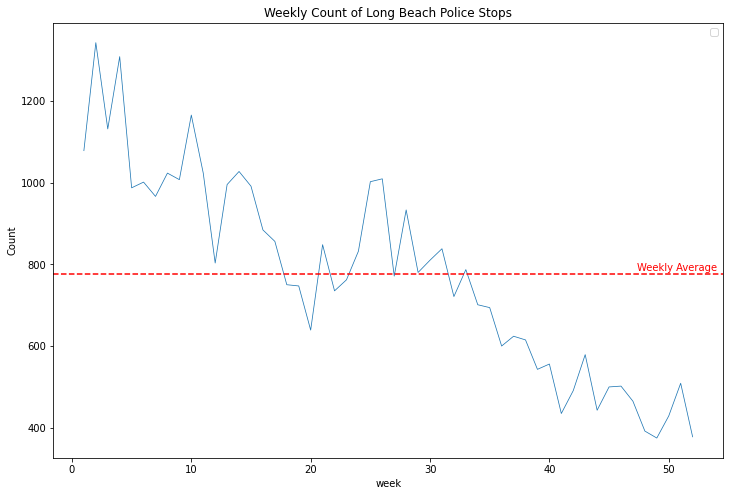

In [62]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.lineplot(x=weekly_count.index, y='Count', data=weekly_count, size=0.75)
g.axhline(weekly_mean, ls='--', color='r')
fig.text(0.8, 0.45, 'Weekly Average', color='r')
g.set_title('Weekly Count of Long Beach Police Stops')
plt.legend('');

Text(0.5, 1.0, 'Weekly Running Total')

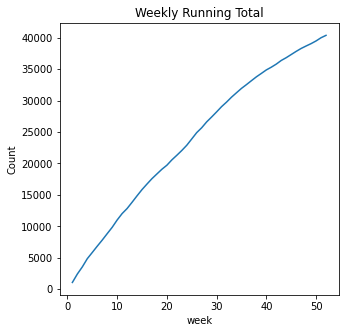

In [63]:
running_weekly_df = weekly_count.cumsum()

fig, ax = plt.subplots(figsize=(5,5))
g = sns.lineplot(x = running_weekly_df.index, y = 'Count', data=running_weekly_df)
g.set_title('Weekly Running Total')

### Monthly Count of Stops

In [64]:
monthly_count = daily_count_df.copy()
monthly_count['month'] = pd.to_datetime(monthly_count['stopDate']).dt.month
monthly_count = monthly_count.groupby('month').sum()

In [65]:
monthly_mean = monthly_count.values.mean()

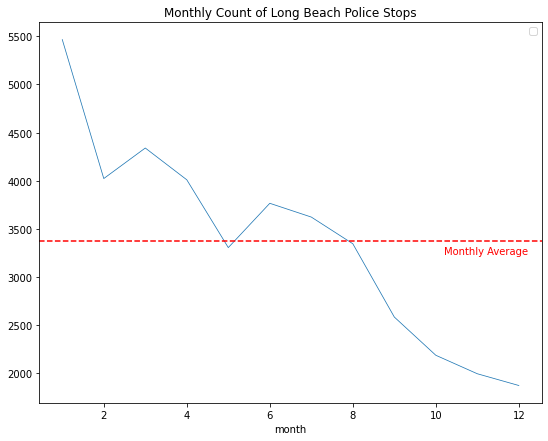

In [66]:
fig, ax = plt.subplots(figsize=(9,7))
g = sns.lineplot(x=monthly_count.index, y='Count', data=monthly_count, size=0.75)
g.axhline(monthly_mean, ls='--', color='r')
g.set_title('Monthly Count of Long Beach Police Stops')
g.set_ylabel('')
fig.text(0.75, 0.42, 'Monthly Average', color='red')
plt.legend('');

In [67]:
# Running Monthly Total
running_monthly = monthly_count.cumsum()
running_monthly.rename(columns={'Count':'Running Total'}, inplace=True)
running_monthly

,Running Total
month,
1,5466
2,9489
3,13829
4,17839
5,21145
6,24911
7,28534
8,31880
9,34465


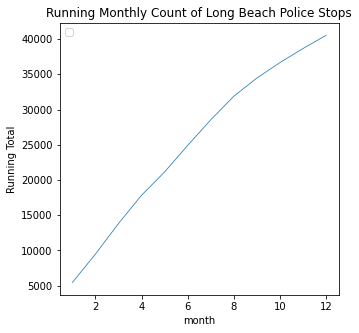

In [68]:
fig, ax = plt.subplots(figsize=(5,5))
g = sns.lineplot(x=running_monthly.index, y='Running Total', data=running_monthly, size=0.75)
g.set_title('Running Monthly Count of Long Beach Police Stops')
plt.legend('');